In [25]:
#hello
#link to kaggle dataset for lung cancer https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer 

In [26]:
# Model Training and preprocessing libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

# Performance evaluation libraries

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics



In [27]:

df = pd.read_csv("/content/heart_2020_cleaned.csv.zip")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [28]:
df = df.replace(to_replace = ['Yes','No'],value = [1,0])
df = df.replace(to_replace = ['Yes (during pregnancy)','No, borderline diabetes'],value = [2,3])
df = df.replace(to_replace = ['Female','Male'],value = [1,0])
df = df.replace(to_replace = ['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older'],value = [0,1,2,3,4,5,6,7,8,9,10,11,12])
df = df.replace(to_replace = ['American','American Indian/Alaskan Native','Asian','Black','Hispanic','Other','White'],value = [0,1,2,3,4,5,6])
df = df.replace(to_replace = ['Poor','Fair','Good','Very good','Excellent'],value = [0,1,2,3,4])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,6,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,6,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,6,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,6,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,6,0,1,3,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,8,4,1,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,3,4,0,1,3,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,5,4,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,1,4,0,0,2,12.0,0,0,0


In [29]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

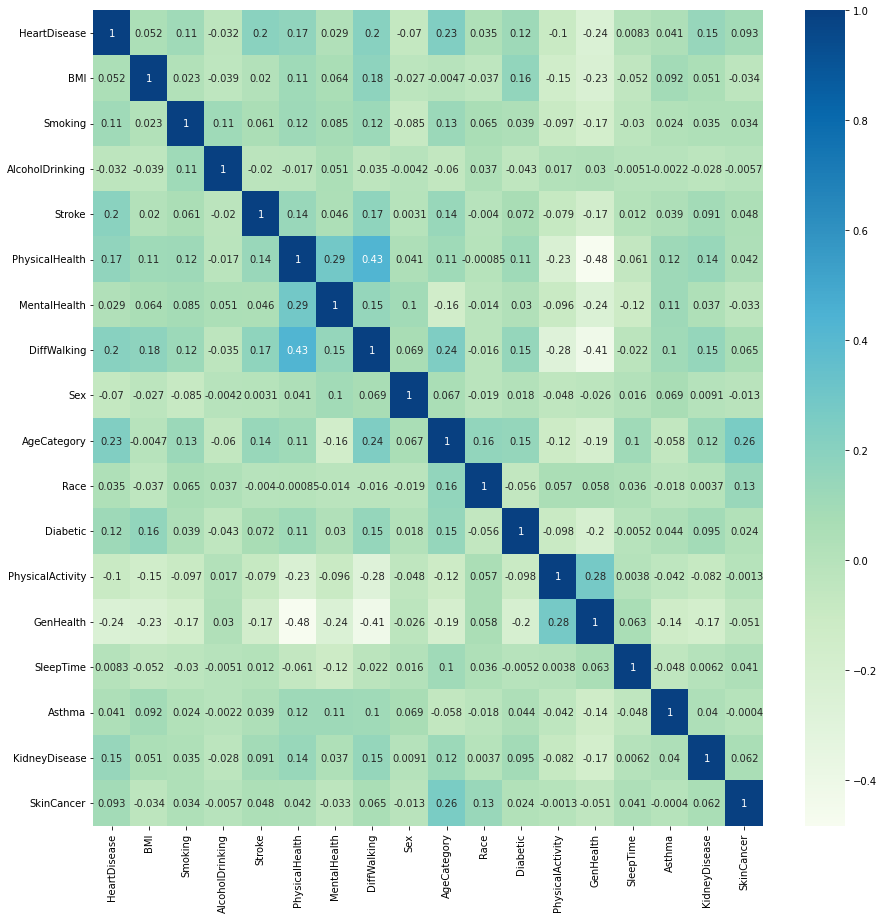

In [30]:
plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True,cmap='GnBu')

1. clean data
2. even out data
3. turn yes/no into 2/1
4. classify
5. accuracy

In [31]:
df_majority = df[(df['HeartDisease']==1)]
df_minority = df[(df['HeartDisease']==0)]

df_minority_upsampled = resample(df_minority,
                                 replace =True,
                                 n_samples =27373,
                                 random_state =42)
df_majority_downsampled = resample(df_majority,
                                 replace =True,
                                 n_samples =27373,
                                 random_state =42)

df_upsampled = pd.concat([df_minority_upsampled, df_majority_downsampled])

In [32]:
df_upsampled['HeartDisease'].value_counts()

0    27373
1    27373
Name: HeartDisease, dtype: int64

In [33]:
#https://www.kaggle.com/code/prateek14py/heart-disease-risk-prediction/data

In [34]:
X= df_upsampled.iloc[:,2:18]

In [35]:
X.shape

(54746, 16)

In [36]:
y=df_upsampled["HeartDisease"]

In [37]:
y.shape

(54746,)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [39]:
"""
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, X_test)
"""

'\ndtc = tree.DecisionTreeClassifier()\ndtc.fit(X_train, X_test)\n'

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

rfpred = rfc.predict(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lrpred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [42]:
accuracy = accuracy_score(rfpred,y_test)
accuracy

0.7863666252648499

In [43]:
precision = precision_score(rfpred,y_test)
precision

0.8268726318857476

In [44]:
recall = recall_score(rfpred,y_test)
recall

0.7657219973009447

In [45]:
accuracy = accuracy_score(lrpred,y_test)
accuracy

0.7583838679038504

In [46]:
precision = precision_score(lrpred,y_test)
precision

0.7681433984261148

In [47]:
recall = recall_score(lrpred,y_test)
recall

0.7544010304851868